In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

In [19]:
dataset=pd.read_csv("/content/diabetes.csv")

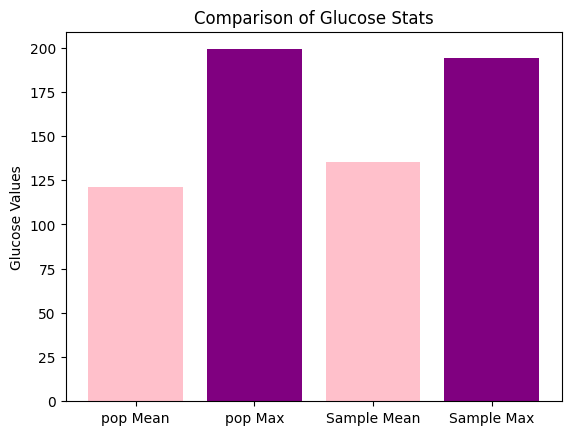

In [20]:

np.random.seed(949)


sample_data = dataset.sample(25)

pop_mean_glucose = dataset['Glucose'].mean()
pop_max_glucose = dataset['Glucose'].max()

sample_data_mean_glucose = sample_data['Glucose'].mean()
sample_data_max_glucose = sample_data['Glucose'].max()


# Create a bar chart for comparison
attribute = ['pop Mean', 'pop Max', 'Sample Mean', 'Sample Max']
values = [pop_mean_glucose, pop_max_glucose, sample_data_mean_glucose, sample_data_max_glucose]

pt.bar(attribute, values, color=['pink', 'purple', 'pink', 'purple'])
pt.title('Comparison of Glucose Stats')
pt.ylabel('Glucose Values')
pt.show()


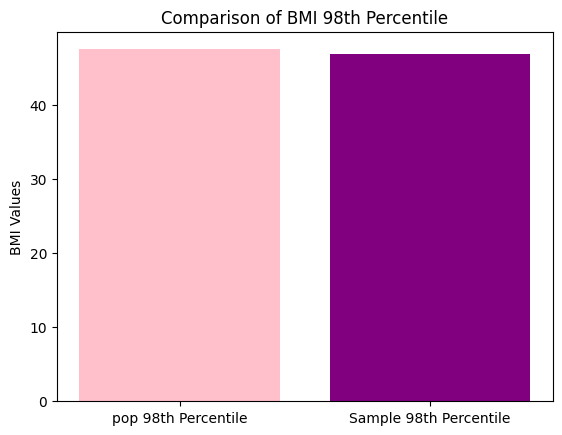

In [21]:
pop_percentage = np.percentile(dataset['BMI'], 98)
sample_data_percentage = np.percentile(sample_data['BMI'], 98)

attributes = ['pop 98th Percentile', 'Sample 98th Percentile']
values = [pop_percentage, sample_data_percentage]

pt.bar(attributes, values, color=['pink', 'purple'])
pt.title('Comparison of BMI 98th Percentile')
pt.ylabel('BMI Values')
pt.show()

In [22]:

bootstrp_sample = 500
sample_size = 150


btstrap_mean = np.zeros(bootstrp_sample)
btstrap_std_dev = np.zeros(bootstrp_sample)
btstrap_percentile = np.zeros(bootstrp_sample)


for i in range(bootstrp_sample):
    btstrap_sample = dataset['BloodPressure'].sample(sample_size, replace=True)
    btstrap_mean[i] = btstrap_sample.mean()
    btstrap_std_dev[i] = btstrap_sample.std()
    btstrap_percentile[i] = np.percentile(btstrap_sample, 98)


pop_mean = dataset['BloodPressure'].mean()
pop_std_dev = dataset['BloodPressure'].std()
pop_percentile = np.percentile(dataset['BloodPressure'], 98)


bmean=np.mean(btstrap_mean)
bsd=np.mean(btstrap_std_dev)
bp=np.mean(btstrap_percentile)


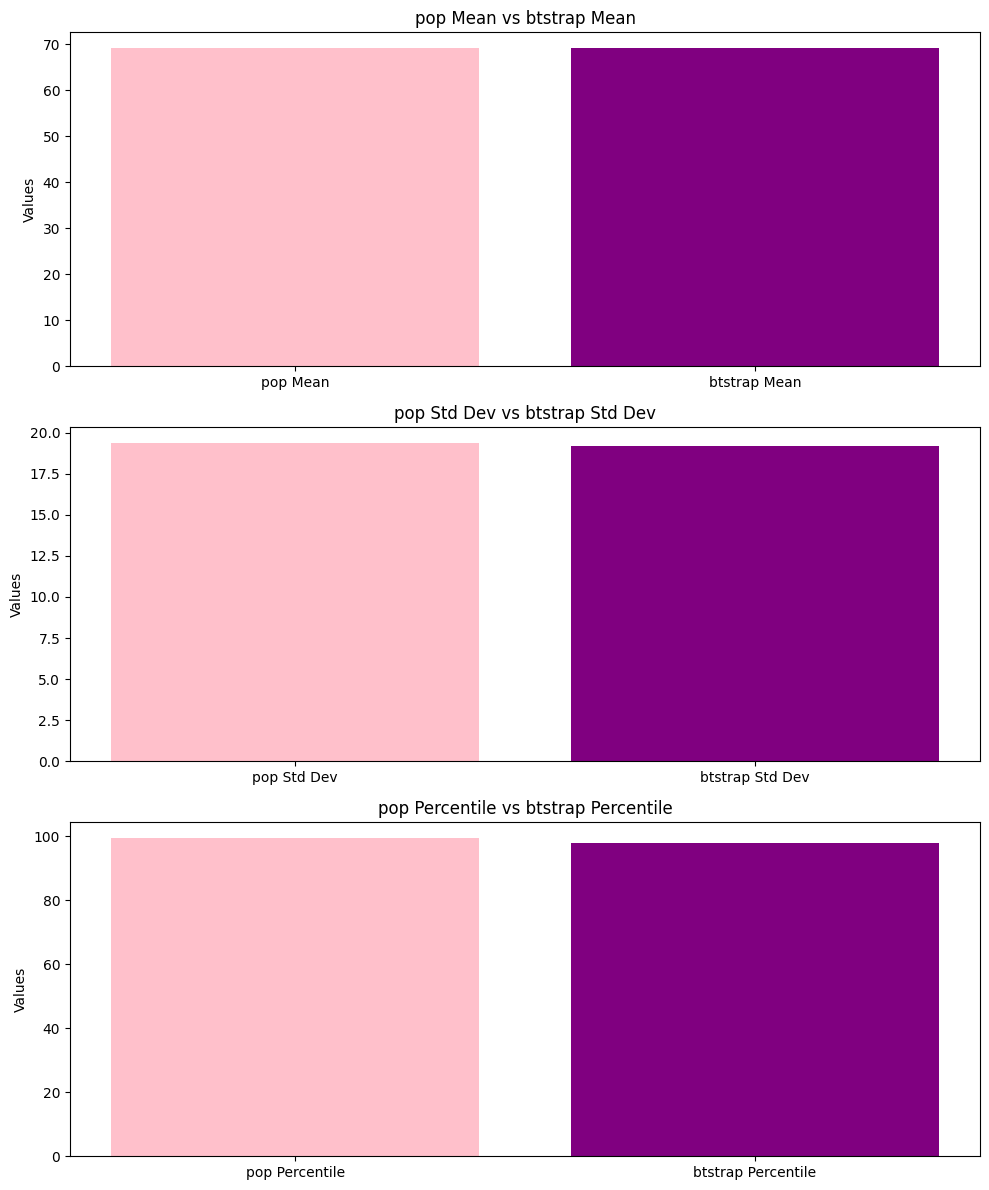

In [24]:
fig, axis = pt.subplots(3, 1, figsize=(10, 12))


axis[0].bar(['pop Mean', 'btstrap Mean'], [pop_mean, bmean], color=['pink', 'purple'])
axis[0].set_ylabel('Values')
axis[0].set_title('pop Mean vs btstrap Mean')


axis[1].bar(['pop Std Dev', 'btstrap Std Dev'], [pop_std_dev, bsd], color=['pink', 'purple'])
axis[1].set_ylabel('Values')
axis[1].set_title('pop Std Dev vs btstrap Std Dev')


axis[2].bar(['pop Percentile', 'btstrap Percentile'], [pop_percentile, bp], color=['pink', 'purple'])
axis[2].set_ylabel('Values')
axis[2].set_title('pop Percentile vs btstrap Percentile')

pt.tight_layout()
pt.show()